<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np

In [0]:
from math import sqrt

def mean(num_array):
    """ Sum divided by length """
    return sum(num_array) / len(num_array)

def variance(num_array):
    """ Average square difference from the mean """
    ave = mean(num_array)
    return mean(list(map(lambda x: (x-ave)**2, num_array)))

def std_dev(num_array):
    """ Square root of the variance """
    return sqrt(variance(num_array))

In [0]:
arr = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(f"Mean: {mean(arr):.2f}")
print(f"Variance: {variance(arr):.2f}")
print(f"Standard Deviation: {std_dev(arr):.2f}")

Mean: 3052.71
Variance: 183761.06
Standard Deviation: 428.67


Checking my work with library methods:

In [0]:
print(f"Mean: {np.mean(arr):.2f}")
print(f"Variance: {np.var(arr, ddof=1):.2f}")
print(f"Standard Deviation: {np.std(arr, ddof=1):.2f}")

Mean: 3052.71
Variance: 214387.90
Standard Deviation: 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np

In [0]:
arr2 = [127, 80, 105, 92, 120, 115, 93]

In [0]:
np.cov(arr, arr2)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame({'last week': arr, 'this week': arr2})
df

,last week,this week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
std_1 = np.std(df['last week'], ddof=1)
std_2 = np.std(df['this week'], ddof=1)
cov_arr = df['last week'].cov(df['this week'])
print(f"correlation coefficient: {cov_arr / (std_1 * std_2):.2f}")

correlation coefficient: 0.96


In [0]:
df.corr()  # checking my work

,last week,this week
last week,1.000000,0.962834
this week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

In [0]:
titanic_df = pd.read_csv(url)
print("variance covariance\n", titanic_df.cov())
print()
print("correlation matrix\n", titanic_df.corr())

variance covariance
                      Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]

correlation matrix
                   Unnamed: 0    pclass  ...      body  has_cabin_number
Unnamed: 0          1.000000  0.897822  ...  0.015558         -0

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Perpendicular

In [0]:
import matplotlib.pyplot as plt

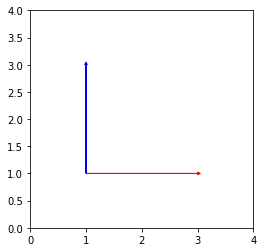

In [0]:
a = [1, 1, 2, 0]
b = [1, 1, 0, 2]
fig, ax = plt.subplots(figsize=(4,4))
plt.arrow(*a, head_width=0.05, head_length=0.05, color='red')
plt.arrow(*b, head_width=0.05, head_length=0.05, color='blue')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a, b)

-40

These vectors are not orthogonal because the dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

### These value are all the same.

In [0]:
# ||c||^2
np.linalg.norm(c)**2

665.0

In [0]:
# c dot c
np.dot(c, c)

665

In [0]:
# c transpose c
np.matmul(c.T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

<br><br>
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7
\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12
\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}
<br><br>
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2
\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f / np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

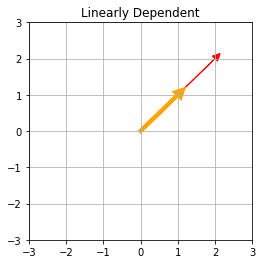

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.arrow(0, 0, 2, 2, head_width=0.2, head_length=0.2, linewidth=1, color='red')
plt.arrow(0, 0, 1, 1, head_width=0.2, head_length=0.2, linewidth=4, color='orange')
plt.title("Linearly Dependent")
plt.show()

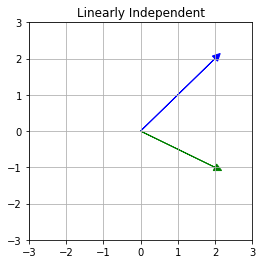

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.arrow(0, 0, 2, 2, head_width=0.2, head_length=0.2, color='blue')
plt.arrow(0, 0, 2, -1, head_width=0.2, head_length=0.2, color='green')
plt.title("Linearly Independent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

### Span = 1 dimension
The set of all vectors along the line in the graph below. G and H are linearly dependent, otherwise the span would be all of 2d space.

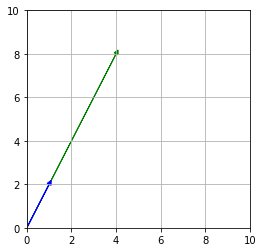

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(0,10)
plt.ylim(0,10)

plt.arrow(0, 0, 4, 8, head_width=0.2, head_length=0.2, color='green')
plt.arrow(0, 0, 1, 2, head_width=0.2, head_length=0.2, color='blue')
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

### Span = 3

In [0]:
P = pd.DataFrame([[1, 2, 3],[-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(P)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



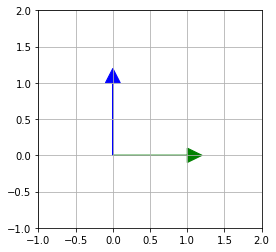

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,2)
plt.ylim(-1,2)

plt.arrow(0, 0, 0, 1, head_width=0.2, head_length=0.2, color='blue')
plt.arrow(0, 0, 1, 0, head_width=0.2, head_length=0.2, color='green')
plt.show()

## 6.2 What does it mean to form a basis?

From Quora.com:
> A basis of a vector space is any linearly independent subset of it that spans the whole vector space. In other words, each vector in the vector space can be written exactly in one way as a linear combination of the basis vectors. The dimension of a vector space is the number of vectors in any of its bases.

or

The basis of a vector space is a set of linearly independent vectors that span the full space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = pd.DataFrame([[1, 2, 3],[-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(P)

3

P rank = 3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [0]:
v = np.array([1, 3])
w = np.array([-1, 2])
proj = np.dot(w, v) / np.dot(v, v) * v
proj

array([0.5, 1.5])

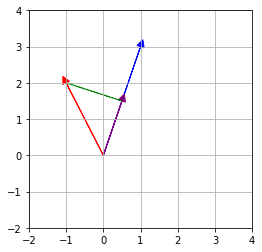

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,4)
plt.ylim(-2,4)

plt.arrow(0, 0, -1, 2, head_width=0.2, head_length=0.2, color='red')
plt.arrow(0, 0, 1, 3, head_width=0.2, head_length=0.2, color='blue')
plt.arrow(0, 0, *proj, head_width=0.2, head_length=0.2, color='purple')
plt.arrow(*proj, -1.5, 0.5, linestyle='--', color='green')
plt.show()

# Stretch Goal

For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


def projection(x, y):
    return np.dot(x, y) / np.dot(y, y) * y

def linear_projections(x_values, y_values):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.grid()
    plt.xlim(0,10)
    plt.ylim(0,10)
    data = {"x": x_values, "y": y_values}
    df = pd.DataFrame(data)
    plt.arrow(0, 0, 10, 10, color='red')
    plt.scatter(df.x, df.y)
    for i in range(len(x_values)):
        a, b = projection(df.iloc[i], np.array([10, 10]))
        c, d = df.iloc[i][0] - a, df.iloc[i][1] - b
        plt.arrow(a, b, c, d, linestyle='--', color='purple')
    plt.show()

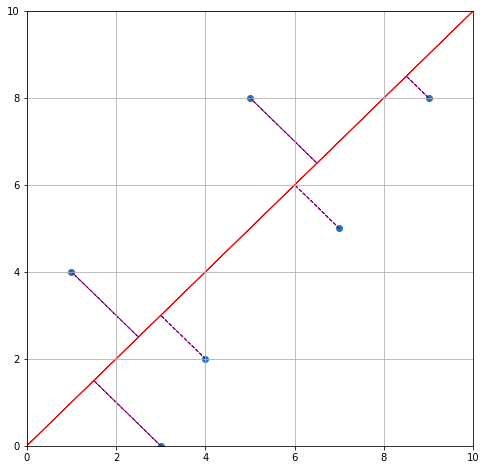

In [0]:
x = [1, 4, 7, 3, 9, 5]
y = [4, 2, 5, 0, 8, 8]
linear_projections(x, y)